In [1]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt


In [2]:
xraw = np.array(range(101))

In [3]:
y = np.sin(2*np.pi*1*(xraw + 25/16)/25) + np.sin(2*np.pi*1*(xraw + 25/6)/25) 

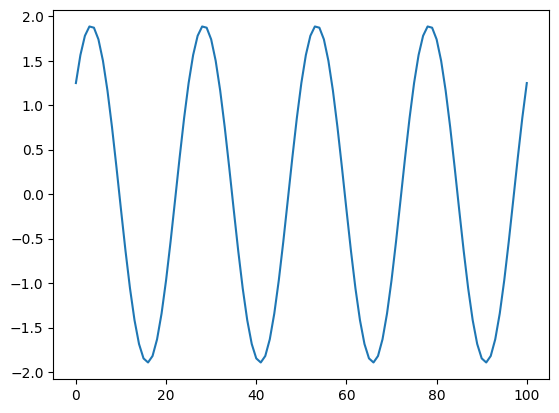

In [4]:
plt.plot(y)

In [5]:
feats = pd.DataFrame()

feats['SIN_1_25_1'] = np.sin(2*np.pi*1*(xraw)/25)
feats['COS_1_25_1'] = np.cos(2*np.pi*1*(xraw)/25)

In [6]:
Xtrain,Xtest,ytrain,ytest = train_test_split(feats,y,test_size=25,random_state=42,shuffle=False)

In [7]:

model = Pipeline(
    steps = [
        #('scaler',MinMaxScaler()),
        ('learner',LinearRegression(fit_intercept=True))
    ]
).fit(Xtrain,ytrain)

In [8]:
yfit = pd.Series(model.predict(Xtrain),index=Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index=Xtest.index)

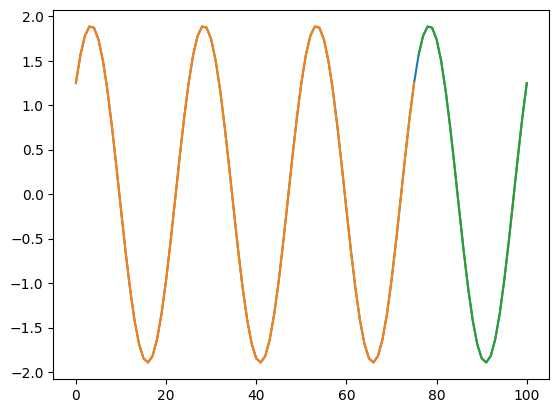

In [9]:

plt.plot(y)
plt.plot(yfit[:])
plt.plot(ypred)

In [10]:
print(model['learner'].coef_)
print(model['learner'].intercept_)

[1.42387953 1.24870884]
-1.2836953722228372e-16


[0.1        0.69282032]
-3.8163916471489756e-17


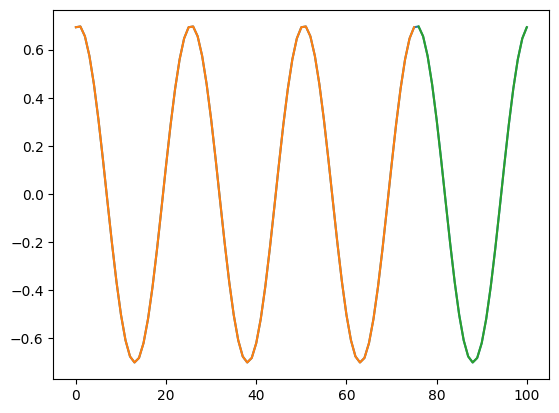

In [17]:
y = .5*np.sin(2*np.pi*1*(xraw + 0)/25) + .8*np.sin(2*np.pi*1*(xraw + 25/3)/25) 

feats = pd.DataFrame()

feats['SIN_1_25_1'] = np.sin(2*np.pi*1*(xraw)/25)
feats['COS_1_25_1'] = np.cos(2*np.pi*1*(xraw)/25)

Xtrain,Xtest,ytrain,ytest = train_test_split(feats,y,test_size=25,random_state=42,shuffle=False)


model = Pipeline(
    steps = [
        #('scaler',MinMaxScaler()),
        ('learner',LinearRegression(fit_intercept=True))
    ]
).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),index=Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index=Xtest.index)


plt.plot(y)
plt.plot(yfit[:])
plt.plot(ypred)

print(model['learner'].coef_)
print(model['learner'].intercept_)